In [1]:
import pandas as pd;
import seaborn as srn;
import statistics as sts;
#aqui importei as bibliotecas que julguei necessárias para a realização de tal desafio

In [2]:
dataset = pd.read_excel("data.xlsx"); #puxando a planilha Excel para que seus dados sirvam de Entrada nesse código
dataset.head() #exibindo na tela para conferir se de fato foi 'importado' o arquivo correto e para verificar o estado dos dados, perceba que, em razão da formatação do Excel, é necessário tratar esses dados

,GPS Data,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,Flight:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Sample Interval (s):,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Time Offset,NaN,-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Altitude Offset,NaN,-171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Beeline File,NaN,NaN,NaN,Calculated,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
dataset.drop(index=[0,1,2,3,4,5], inplace=True) #aqui foi removida a formatação da planilha, considere isso uma tratagem de dados para que seja possívelm aplicar as bibliotecas usando os dados da tabela sem dar confusão no código
dataset.head() #exibindo a planilha re-formatada para conferir se alterações de fato ocorreram. (Perceba que nem todos os dados foram tratados de forma 100% eficaz, devido a isso continuo na busca de como solucionar esse problema!)

,GPS Data,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
6,-120.068167,36.51244,53,!-- 38490 sats:11 UTC 17:44:36 -->,0,0,173.88452,2.88452,1,-18,NaN,NaN,NaN,NaN,NaN
7,-120.068167,36.512442,54,!-- 38505 sats:11 UTC 17:44:37 -->,0,0.729062,177.16536,6.16536,2,-17,3.28084,2.236089,0.729062,NaN,NaN
8,-120.068167,36.512443,54,!-- 38520 sats:11 UTC 17:44:38 -->,0,1.093594,177.16536,6.16536,3,-16,0,0,1.093594,NaN,NaN
9,-120.068167,36.512445,54,!-- 38535 sats:11 UTC 17:44:39 -->,0,1.822656,177.16536,6.16536,4,-15,0,0,1.822656,NaN,NaN
10,-120.068168,36.512445,54,!-- 38550 sats:11 UTC 17:44:40 -->,-0.292984,1.822656,177.16536,6.16536,5,-14,0,0,2.11564,NaN,NaN


In [4]:
dataset.columns = ["Longitude", "Latitude", "Altitude(m)", "counter:", "East", "North", "Altitude(ft)", "Altitude (ft)", "Time(s)", "Offset", "VerticleVel(fps)", "VerticleVel(mph)", "GroundDist", "GroundVel", "Acceller"]
#aqui se alterou o apelido das colunas para facilitar o acesso a elas durante o código

In [5]:
dataset.head() #plotando a planilha para conferir se as alterações foram de fato efetuadas

,Longitude,Latitude,Altitude(m),counter:,East,North,Altitude(ft),Altitude (ft),Time(s),Offset,VerticleVel(fps),VerticleVel(mph),GroundDist,GroundVel,Acceller
6,-120.068167,36.51244,53,!-- 38490 sats:11 UTC 17:44:36 -->,0,0,173.88452,2.88452,1,-18,NaN,NaN,NaN,NaN,NaN
7,-120.068167,36.512442,54,!-- 38505 sats:11 UTC 17:44:37 -->,0,0.729062,177.16536,6.16536,2,-17,3.28084,2.236089,0.729062,NaN,NaN
8,-120.068167,36.512443,54,!-- 38520 sats:11 UTC 17:44:38 -->,0,1.093594,177.16536,6.16536,3,-16,0,0,1.093594,NaN,NaN
9,-120.068167,36.512445,54,!-- 38535 sats:11 UTC 17:44:39 -->,0,1.822656,177.16536,6.16536,4,-15,0,0,1.822656,NaN,NaN
10,-120.068168,36.512445,54,!-- 38550 sats:11 UTC 17:44:40 -->,-0.292984,1.822656,177.16536,6.16536,5,-14,0,0,2.11564,NaN,NaN


In [6]:
dataset['Altitude(ft)'].describe() #apresentando informações estatísticas da altitude em pés

count     266.00000
unique    225.00000
top       177.16536
freq       20.00000
Name: Altitude(ft), dtype: float64

In [7]:
medianaAlt = sts.median(dataset['Altitude(ft)']) #apresentando a mediana da altitude em pés
medianaAlt #chamando a variável para que seja exibida ao usuário

4220.80066

In [8]:
mediaAlt = sts.mean(dataset['Altitude(ft)']) #apresentando a média da altitude em pés
mediaAlt #chamando a variável para que seja exibida ao usuário

4537.35238406015

In [9]:
dataset['Altitude(ft)'].max() #apresentando a máxima altitude em pés

10921.91636

In [10]:
dataset['Altitude (ft)'].min() #apresentando a mínima altitude em pés

-6.957999999999998

<Axes: xlabel='Time(s)'>

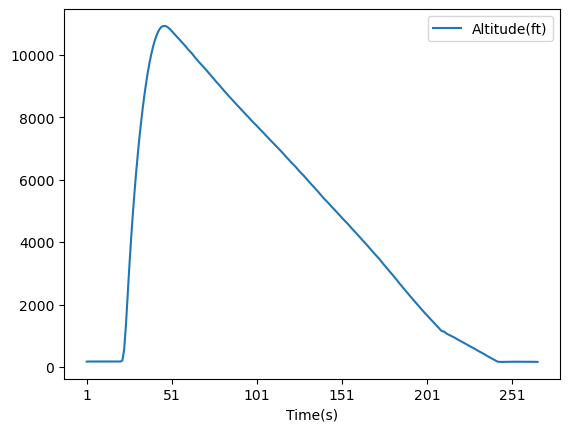

In [11]:
dataset.plot(y='Altitude(ft)', x='Time(s)') #gráfico Altitude X Tempo

In [12]:
dataset['Altitude(m)'].describe() #apresentando informações estatísticas da altitude em metros

count     266
unique    225
top        54
freq       20
Name: Altitude(m), dtype: int64

In [13]:
medianaAltm = sts.median(dataset['Altitude(m)']) #apresentando a mediana da altitude em metros
medianaAltm #chamando a variável para que seja exibida ao usuário

1286.5

In [14]:
mediaAltm = sts.mean(dataset['Altitude(m)']) #apresentando a média da altitude em metros
mediaAltm #chamando a variável para que seja exibida ao usuário

1382.984962406015

In [15]:
dataset['Altitude(m)'].max() #apresentando a máxima altitude em metros

3329

In [16]:
dataset['Altitude(m)'].min() #apresentando a mínima altitude em metros 

50

<Axes: xlabel='Time(s)'>

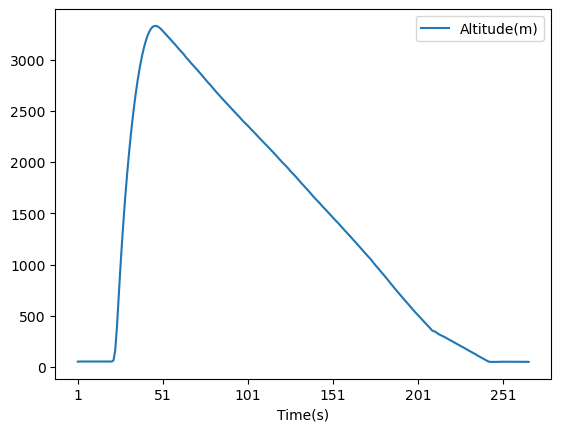

In [17]:
dataset.plot(y='Altitude(m)', x= 'Time(s)') #plotando gráfico Altitude X Tempo

In [18]:
dataset['Acceller'].describe() #apresentando informações estatísticas da aceleração

count     260
unique     78
top         0
freq       53
Name: Acceller, dtype: int64

In [19]:
medianaAc = sts.median(dataset['Acceller']) #apresentando mediana da aceleração
medianaAc #chamando a variável para que seja exibida ao usuário

0.0

In [20]:
mediaAc = sts.mean(dataset['Acceller']) #apresentando média da aceleração 
mediaAc #chamando a variável para que seja exibida ao usuário. (Deu alguma treta aqui em razão da tratagem dos dados não ter sido 100% eficaz)

nan

In [21]:
dataset['Acceller'].max() #apresentando mínima aceleração

12.508202499999996

In [22]:
dataset['Acceller'].min() #apresentando mínima aceleração

-2.358103750000012

<Axes: xlabel='Time(s)'>

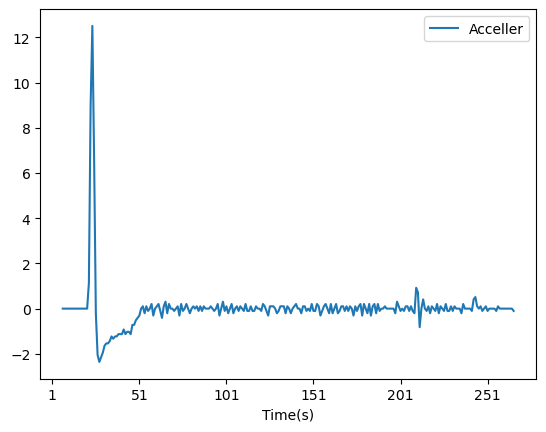

In [23]:
dataset.plot(y='Acceller', x='Time(s)') #plotando gráfico Aceleração X Tempo

<Axes: xlabel='GroundDist'>

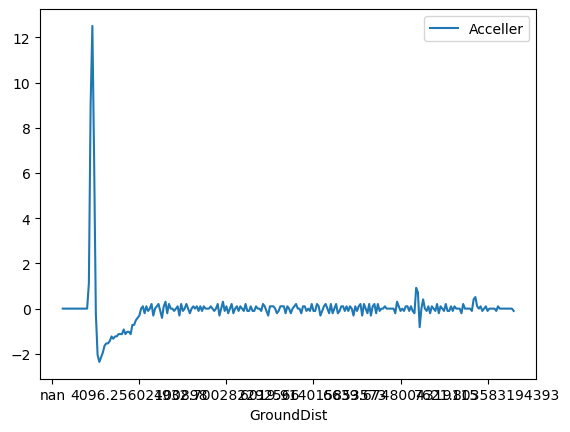

In [24]:
dataset.plot(y='Acceller', x='GroundDist') #plotando Gráfico Acelerção X Distância em relação ao solo

<Axes: xlabel='Altitude(m)'>

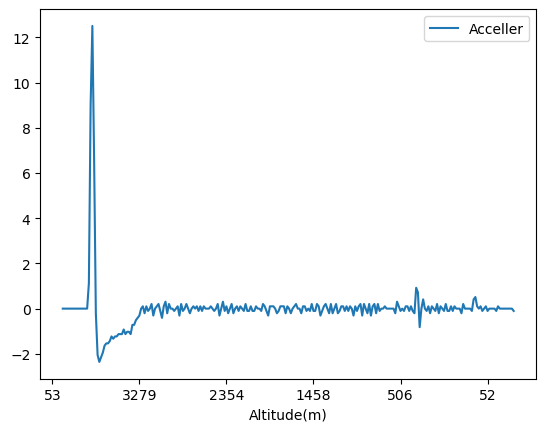

In [25]:
dataset.plot(y='Acceller', x='Altitude(m)') #plotando Gráfico Acelerção X Altitude

In [26]:
dataset['GroundDist'].describe() #apresentando informações estatísticas da distância em relação ao solo

count      265.000000
unique     249.000000
top       7632.830302
freq         4.000000
Name: GroundDist, dtype: float64

In [27]:
dataset['GroundDist'].max() #apresentando máxima distância em relação ao solo

7632.8303020066305

In [28]:
dataset['GroundDist'].min() #apresentando mínima distância em relação ao solo

0.7290624007494444

In [29]:
medianaGD = sts.median(dataset['GroundDist']) #apresentando mediana da distância em relação ao solo
medianaGD #chamando a variável para que seja exibida ao usuário

5679.930248711989

In [30]:
mediaGD = sts.mean(dataset['GroundDist']) #apresentando média da distância em relação ao solo
mediaGD #chamando a variável para que seja exibida ao usuário

nan

<Axes: xlabel='Time(s)'>

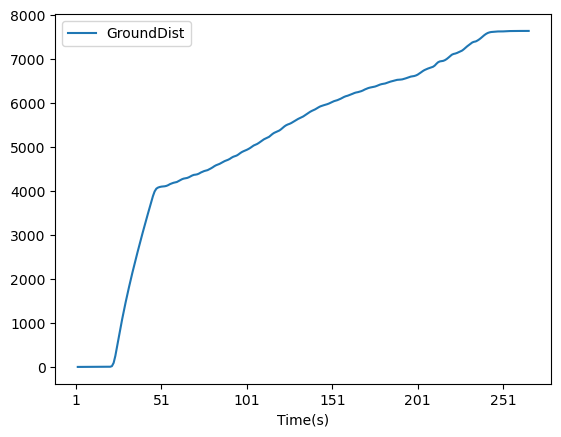

In [31]:
dataset.plot(y='GroundDist', x='Time(s)') #plotando gráfico Dsitância em relação ao Solo X Tempo

In [32]:
medianaGV = sts.median(dataset['GroundVel']) #cálculo da mediana da velocidade de solo
medianaGV #chamando a variável para que seja exibida ao usuário

11.32043157200428

In [33]:
mediaGV = sts.mean(dataset['GroundVel']) #cálculo da media da velocidade de solo
mediaGV #chamando a variável para que seja exibida ao usuário. (Deu alguma treta aqui em razão da tratagem dos dados não ter sido 100% eficaz)

nan

In [34]:
dataset['GroundVel'].describe() #informações estatística da velocidade de solo

count     260
unique    241
top         0
freq       15
Name: GroundVel, dtype: int64

In [35]:
dataset['GroundVel'].max() #máxima velocidade de solo

146.99733501897012

In [36]:
dataset['GroundVel'].min() ##mínima velocidade de solo

0

<Axes: xlabel='Time(s)'>

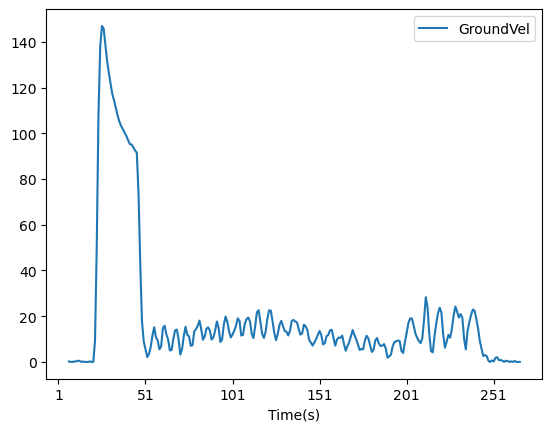

In [37]:
dataset.plot(y='GroundVel', x='Time(s)') #plotando gráfico Velocidade de solo X Tempo

<Axes: >

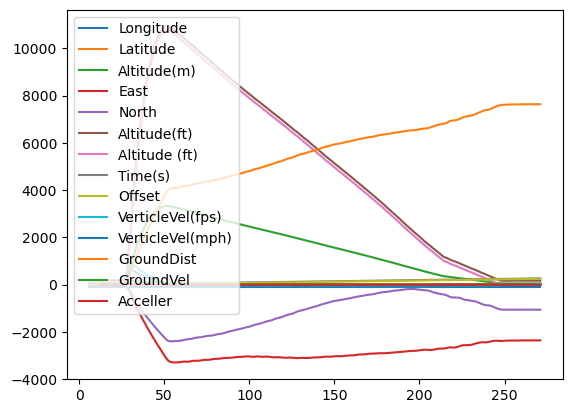

In [38]:
dataset.plot() #plotando gráfico geral de todas as grandezas juntas